In [1]:
!pip install psycopg2-binary

In [ ]:
## Open PostgreSQL.app (CLI) and pgAdmin (GUI) at same time
## https://jimmyswebnote.com/postgresql-tutorial/

In [10]:
import psycopg2
conn = psycopg2.connect(database="Airlines", user="postgres", host="localhost")
print("Opened database successfully")

Opened database successfully


In [11]:
cur = conn.cursor()

In [12]:
cur.execute("SELECT * FROM ticket_flights")

In [13]:
cur.fetchmany(5)

[('0005432159776', 30625, 'Business', Decimal('42100.00')),
 ('0005435212351', 30625, 'Business', Decimal('42100.00')),
 ('0005435212386', 30625, 'Business', Decimal('42100.00')),
 ('0005435212381', 30625, 'Business', Decimal('42100.00')),
 ('0005432211370', 30625, 'Business', Decimal('42100.00'))]

In [14]:
# # SQL
# COPY (SELECT passenger_name, DATE_PART('day', book_date) AS day,DATE_PART ('month', book_date) AS month,
# 	  (SELECT city FROM airports WHERE airport_code = f.departure_airport) AS departure_city,
# 	  (SELECT city FROM airports WHERE airport_code = f.arrival_airport) AS arrival_city,
# 	  SUM (total_amount) AS sales
# 	  FROM bookings b
# 	  JOIN tickets t 
# 	  ON b.book_ref = t.book_ref
# 	  JOIN ticket_flights tf 
# 	  ON t.ticket_no = tf.ticket_no
# 	  JOIN flights f
# 	  ON tf.flight_id = f.flight_id
# 	  GROUP BY 1,2,3,4,5
# 	  ORDER BY 3,6) TO '/Users/juck30808/Documents/GitHub/WhaleFall/output/postgres.csv' DELIMITER ',' CSV HEADER;
	  
	  

Excel Output
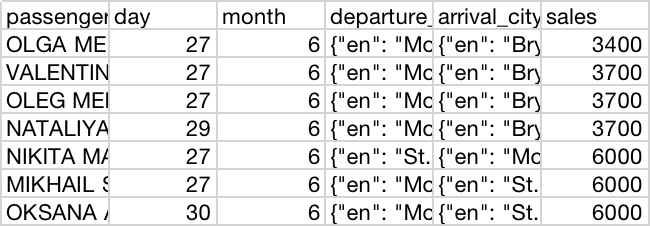

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('output/postgres.csv')

In [24]:
df.head()  #(50) 

,passenger_name,day,month,departure_city,arrival_city,sales
0,OLGA MELNIKOVA,27,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3400.0
1,VALENTIN ABRAMOV,27,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3700.0
2,OLEG MELNIKOV,27,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3700.0
3,NATALIYA KUZNECOVA,29,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3700.0
4,NIKITA MATVEEV,27,6,"{""en"": ""St. Petersburg"", ""ru"": ""Санкт-Петербург""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",6000.0


In [25]:
df.columns

Index(['passenger_name', 'day', 'month', 'departure_city', 'arrival_city',
       'sales'],
      dtype='object')

In [26]:
df.passenger_name

0              OLGA MELNIKOVA
1            VALENTIN ABRAMOV
2               OLEG MELNIKOV
3          NATALIYA KUZNECOVA
4              NIKITA MATVEEV
                  ...        
1016769         ROMAN MATVEEV
1016770          ANDREY POPOV
1016771          ANDREY POPOV
1016772      VLADIMIR KULIKOV
1016773      VLADIMIR KULIKOV
Name: passenger_name, Length: 1016774, dtype: object

In [27]:
df

,passenger_name,day,month,departure_city,arrival_city,sales
0,OLGA MELNIKOVA,27,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3400.0
1,VALENTIN ABRAMOV,27,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3700.0
2,OLEG MELNIKOV,27,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3700.0
3,NATALIYA KUZNECOVA,29,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",3700.0
4,NIKITA MATVEEV,27,6,"{""en"": ""St. Petersburg"", ""ru"": ""Санкт-Петербург""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",6000.0
...,...,...,...,...,...,...
1016769,ROMAN MATVEEV,6,8,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",1370400.0
1016770,ANDREY POPOV,6,8,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",1370400.0
1016771,ANDREY POPOV,6,8,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",1370400.0
1016772,VLADIMIR KULIKOV,6,8,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",1370400.0


In [29]:
df1 = df[['passenger_name','day','arrival_city']]
df1

,passenger_name,day,arrival_city
0,OLGA MELNIKOVA,27,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}"
1,VALENTIN ABRAMOV,27,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}"
2,OLEG MELNIKOV,27,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}"
3,NATALIYA KUZNECOVA,29,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}"
4,NIKITA MATVEEV,27,"{""en"": ""Moscow"", ""ru"": ""Москва""}"
...,...,...,...
1016769,ROMAN MATVEEV,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}"
1016770,ANDREY POPOV,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}"
1016771,ANDREY POPOV,6,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}"
1016772,VLADIMIR KULIKOV,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}"


In [30]:
df.tail()

,passenger_name,day,month,departure_city,arrival_city,sales
1016769,ROMAN MATVEEV,6,8,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",1370400.0
1016770,ANDREY POPOV,6,8,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",1370400.0
1016771,ANDREY POPOV,6,8,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",1370400.0
1016772,VLADIMIR KULIKOV,6,8,"{""en"": ""Bryansk"", ""ru"": ""Брянск""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",1370400.0
1016773,VLADIMIR KULIKOV,6,8,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Bryansk"", ""ru"": ""Брянск""}",1370400.0


In [31]:
display(df.iloc[6])

passenger_name                                     OKSANA AFANASEVA
day                                                              30
month                                                             6
departure_city                     {"en": "Moscow", "ru": "Москва"}
arrival_city      {"en": "St. Petersburg", "ru": "Санкт-Петербург"}
sales                                                        6000.0
Name: 6, dtype: object

In [32]:
df.rank()

,passenger_name,day,month,departure_city,arrival_city,sales
0,664325.0,897991.5,13139.5,413851.0,47525.0,28.5
1,840832.5,897991.5,13139.5,413851.0,47525.0,82.5
2,642379.5,897991.5,13139.5,413851.0,47525.0,82.5
3,558918.5,949895.0,13139.5,413851.0,47525.0,82.5
4,591098.0,897991.5,13139.5,838785.5,411802.5,794.5
...,...,...,...,...,...,...
1016769,712005.5,216988.5,842876.5,46857.0,411802.5,1016761.5
1016770,145039.0,216988.5,842876.5,46857.0,411802.5,1016761.5
1016771,145039.0,216988.5,842876.5,413851.0,47525.0,1016761.5
1016772,940578.5,216988.5,842876.5,46857.0,411802.5,1016761.5


In [33]:
df.info

<bound method DataFrame.info of              passenger_name  day  month  \
0            OLGA MELNIKOVA   27      6   
1          VALENTIN ABRAMOV   27      6   
2             OLEG MELNIKOV   27      6   
3        NATALIYA KUZNECOVA   29      6   
4            NIKITA MATVEEV   27      6   
...                     ...  ...    ...   
1016769       ROMAN MATVEEV    6      8   
1016770        ANDREY POPOV    6      8   
1016771        ANDREY POPOV    6      8   
1016772    VLADIMIR KULIKOV    6      8   
1016773    VLADIMIR KULIKOV    6      8   

                                            departure_city  \
0                         {"en": "Moscow", "ru": "Москва"}   
1                         {"en": "Moscow", "ru": "Москва"}   
2                         {"en": "Moscow", "ru": "Москва"}   
3                         {"en": "Moscow", "ru": "Москва"}   
4        {"en": "St. Petersburg", "ru": "Санкт-Петербург"}   
...                                                    ...   
1016769          

In [34]:
import webbrowser

In [36]:
website = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html'
webbrowser.open(website)

True

In [38]:
import pandas as pd
df.dtypes

passenger_name     object
day                 int64
month               int64
departure_city     object
arrival_city       object
sales             float64
dtype: object

In [39]:
df.describe()

,day,month,sales
count,1.016774e+06,1.016774e+06,1.016774e+06
mean,1.396050e+01,7.316214e+00,1.061688e+05
std,8.664978e+00,5.176020e-01,9.912896e+04
min,1.000000e+00,6.000000e+00,3.400000e+03
25%,7.000000e+00,7.000000e+00,4.390000e+04
50%,1.300000e+01,7.000000e+00,7.520000e+04
75%,2.100000e+01,8.000000e+00,1.342000e+05
max,3.100000e+01,8.000000e+00,1.526100e+06


In [40]:
df.sales.describe()

count    1.016774e+06
mean     1.061688e+05
std      9.912896e+04
min      3.400000e+03
25%      4.390000e+04
50%      7.520000e+04
75%      1.342000e+05
max      1.526100e+06
Name: sales, dtype: float64

In [41]:
df['sales'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0             3400.0
1             3700.0
2             3700.0
3             3700.0
4             6000.0
             ...    
1016769    1370400.0
1016770    1370400.0
1016771    1370400.0
1016772    1370400.0
1016773    1370400.0
Name: sales, Length: 1016774, dtype: float64>

In [42]:
df['sales'].mean()

106168.84725612575

In [44]:
df['sales'].median()

75200.0

In [45]:
df.shape

(1016774, 6)

In [46]:
df.size

6100644

In [47]:
round(df.sales.mean(),2)

106168.85

In [49]:
df1 = df.sample(15)
df1

,passenger_name,day,month,departure_city,arrival_city,sales
779483,MARIYA EGOROVA,13,8,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Khanty-Mansiysk"", ""ru"": ""Ханты-Мансийск""}",51800.0
971280,KHALIDA PETROVA,6,8,"{""en"": ""Yekaterinburg"", ""ru"": ""Екатеринбург""}","{""en"": ""Ust Ilimsk"", ""ru"": ""Усть-Илимск""}",193600.0
649764,LYUDMILA MALYSHEVA,17,7,"{""en"": ""Irkutsk"", ""ru"": ""Иркутск""}","{""en"": ""St. Petersburg"", ""ru"": ""Санкт-Петербург""}",378400.0
49819,ELENA ERMAKOVA,1,7,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Samara"", ""ru"": ""Самара""}",16400.0
1002019,ALEKSANDR ANTONOV,14,8,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""St. Petersburg"", ""ru"": ""Санкт-Петербург""}",312400.0
693484,ALEKSANDRA ALEKSEEVA,4,8,"{""en"": ""Perm"", ""ru"": ""Пермь""}","{""en"": ""Nizhniy Novgorod"", ""ru"": ""Нижний Новго...",23200.0
511780,NADEZHDA SAVELEVA,26,7,"{""en"": ""Omsk"", ""ru"": ""Омск""}","{""en"": ""Vorkuta"", ""ru"": ""Воркута""}",135200.0
501226,OLEG KRASNOV,14,7,"{""en"": ""Perm"", ""ru"": ""Пермь""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",131200.0
15348,ROMAN ZAKHAROV,30,6,"{""en"": ""Moscow"", ""ru"": ""Москва""}","{""en"": ""Kaliningrad"", ""ru"": ""Калининград""}",89100.0
724871,NIKITA KUZNECOV,11,8,"{""en"": ""Samara"", ""ru"": ""Самара""}","{""en"": ""Moscow"", ""ru"": ""Москва""}",32700.0


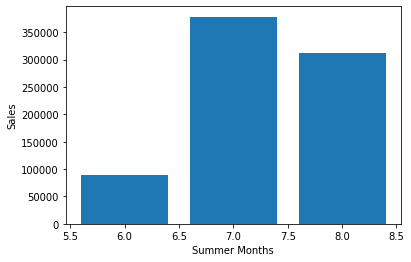

In [51]:
import matplotlib.pyplot as plt
sales = df1['sales']
months = df1['month']
plt.bar(months, sales)
plt.ylabel('Sales')
plt.xlabel('Summer Months')
plt.show()

In [52]:
df2 = df.sample(30)

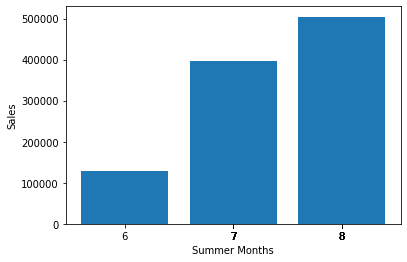

In [53]:
import matplotlib.pyplot as plt
sales = df2['sales']
months = df2['month']
plt.bar(months, sales)
plt.xticks(months,rotation='horizontal',size=10)
plt.ylabel('Sales')
plt.xlabel('Summer Months')
plt.show()

In [54]:
df3 = df.sample(500)

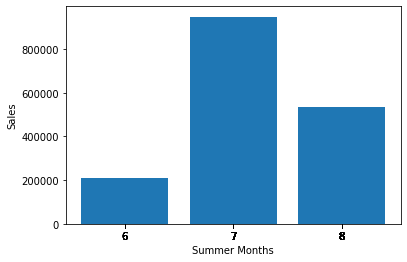

In [55]:
import matplotlib.pyplot as plt
sales = df3['sales']
months = df3['month']
plt.bar(months, sales)
plt.xticks(months,rotation='horizontal',size=10)
plt.ylabel('Sales')
plt.xlabel('Summer Months')
plt.show()

In [57]:
df4 = df.sample(1000)

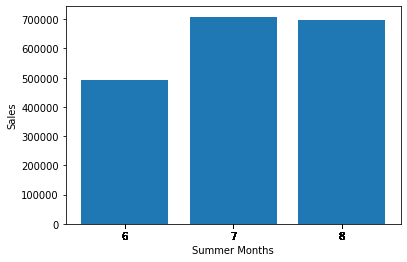

In [58]:
import matplotlib.pyplot as plt
sales = df4['sales']
months = df4['month']
plt.bar(months, sales)
plt.xticks(months,rotation='horizontal',size=10)
plt.ylabel('Sales')
plt.xlabel('Summer Months')
plt.show()

In [59]:
df5 = df.sample(5000)

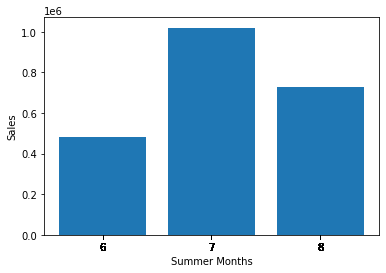

In [60]:
import matplotlib.pyplot as plt
sales = df5['sales']
months = df5['month']
plt.bar(months, sales)
plt.xticks(months,rotation='horizontal',size=10)
plt.ylabel('Sales')
plt.xlabel('Summer Months')
plt.show()

In [61]:
df5 = df.sample(10000)

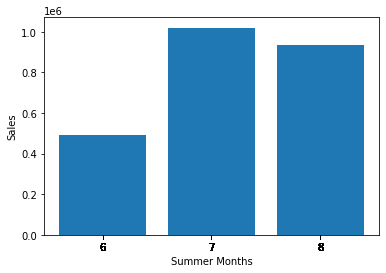

In [62]:
import matplotlib.pyplot as plt
sales = df5['sales']
months = df5['month']
plt.bar(months, sales)
plt.xticks(months,rotation='horizontal',size=10)
plt.ylabel('Sales')
plt.xlabel('Summer Months')
plt.show()

In [63]:
# Delete the csv before update to github